<a href="https://colab.research.google.com/github/maheedhargowd/Content_based_Product_recommendation_System_E-Commerrce/blob/main/recommendation_system_content_based_ecommerce.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import files

# Upload kaggle.json manually
files.upload()


Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"maheedhargowd","key":"493b069bac0ee878b601c7dce43d511d"}'}

In [ ]:
import shutil
import os

# Create the /root/.config/kaggle/ directory if it doesn't exist
os.makedirs("/root/.config/kaggle/", exist_ok=True)

# Move kaggle.json to the correct location
shutil.move("/content/kaggle.json", "/root/.config/kaggle/kaggle.json")

# Verify the file is now in the expected location
!ls -l /root/.config/kaggle/


total 4
-rw-r--r-- 1 root root 69 Feb  5 20:12 kaggle.json


In [ ]:
from kaggle.api.kaggle_api_extended import KaggleApi

api = KaggleApi()
api.authenticate()
print("✅ Kaggle API authenticated successfully!")



✅ Kaggle API authenticated successfully!


In [ ]:
! chmod 600 /root/.config/kaggle/kaggle.json

In [ ]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("vikashrajluhaniwal/fashion-images")

print("Path to dataset files:", path)

100%|██████████| 335M/335M [00:03<00:00, 107MB/s]

Extracting files...


Path to dataset files: /root/.cache/kagglehub/datasets/vikashrajluhaniwal/fashion-images/versions/1


In [ ]:
!ls -la /root/


total 68
drwx------ 1 root root 4096 Feb  5 20:07 .
drwxr-xr-x 1 root root 4096 Feb  5 20:07 ..
-r-xr-xr-x 1 root root 1220 Jan  1  2000 .bashrc
drwxr-xr-x 1 root root 4096 Feb  5 20:12 .cache
drwxr-xr-x 1 root root 4096 Feb  5 20:12 .config
drwxr-xr-x 5 root root 4096 Feb  4 14:32 .ipython
drwx------ 1 root root 4096 Feb  4 14:32 .jupyter
drwxr-xr-x 2 root root 4096 Feb  5 20:07 .keras
drwx------ 3 root root 4096 Feb  4 14:14 .launchpadlib
drwxr-xr-x 1 root root 4096 Feb  4 14:32 .local
drwxr-xr-x 4 root root 4096 Feb  4 14:32 .npm
-rw-r--r-- 1 root root  161 Jul  9  2019 .profile
-r-xr-xr-x 1 root root  254 Jan  1  2000 .tmux.conf
-rw-r--r-- 1 root root  211 Feb  4 14:32 .wget-hsts


In [ ]:
!ls -la /root/.cache/kagglehub/datasets/


total 12
drwxr-xr-x 3 root root 4096 Feb  5 20:12 .
drwxr-xr-x 3 root root 4096 Feb  5 20:12 ..
drwxr-xr-x 3 root root 4096 Feb  5 20:12 vikashrajluhaniwal


In [ ]:
!ls -l /root/.cache/kagglehub/datasets/vikashrajluhaniwal/fashion-images/versions/1/data/


total 572
drwxr-xr-x 4 root root   4096 Feb  5 20:12 Apparel
-rw-r--r-- 1 root root 576755 Feb  5 20:12 fashion.csv
drwxr-xr-x 4 root root   4096 Feb  5 20:12 Footwear


In [ ]:
import shutil

# Define source and destination
src_path = "/root/.cache/kagglehub/datasets/vikashrajluhaniwal/fashion-images/versions/1/data/"
dst_path = "/content/fashion_dataset/"

# Move the dataset
shutil.move(src_path, dst_path)

# Verify that the dataset is now in /content/
!ls -l /content/fashion_dataset/


total 572
drwxr-xr-x 4 root root   4096 Feb  5 20:12 Apparel
-rw-r--r-- 1 root root 576755 Feb  5 20:12 fashion.csv
drwxr-xr-x 4 root root   4096 Feb  5 20:12 Footwear


In [ ]:
import pandas as pd

# Load the dataset from /content/fashion_dataset/
df = pd.read_csv("/content/fashion_dataset/fashion.csv")

# Display first 5 rows
df.head()


,ProductId,Gender,Category,SubCategory,ProductType,Colour,Usage,ProductTitle,Image,ImageURL
0,42419,Girls,Apparel,Topwear,Tops,White,Casual,Gini and Jony Girls Knit White Top,42419.jpg,http://assets.myntassets.com/v1/images/style/p...
1,34009,Girls,Apparel,Topwear,Tops,Black,Casual,Gini and Jony Girls Black Top,34009.jpg,http://assets.myntassets.com/v1/images/style/p...
2,40143,Girls,Apparel,Topwear,Tops,Blue,Casual,Gini and Jony Girls Pretty Blossom Blue Top,40143.jpg,http://assets.myntassets.com/v1/images/style/p...
3,23623,Girls,Apparel,Topwear,Tops,Pink,Casual,Doodle Kids Girls Pink I love Shopping Top,23623.jpg,http://assets.myntassets.com/v1/images/style/p...
4,47154,Girls,Apparel,Bottomwear,Capris,Black,Casual,Gini and Jony Girls Black Capris,47154.jpg,http://assets.myntassets.com/v1/images/style/p...


In [ ]:
df.shape

(2906, 10)


**Lets check Images folder**

In [ ]:
#Check All Files in the Apparel Folder
!ls -l /content/fashion_dataset/Apparel/


total 8
drwxr-xr-x 3 root root 4096 Feb  5 20:12 Boys
drwxr-xr-x 3 root root 4096 Feb  5 20:12 Girls


In [ ]:
# Check All Files in the Footwear Folder
!ls -l /content/fashion_dataset/Footwear/


total 8
drwxr-xr-x 3 root root 4096 Feb  5 20:12 Men
drwxr-xr-x 3 root root 4096 Feb  5 20:12 Women


In [ ]:
#Count the Number of Files in Each Folder
!find /content/fashion_dataset/Apparel/ -type f | wc -l
!find /content/fashion_dataset/Footwear/ -type f | wc -l


1326
1580


Apparel Folder contains 1,326 images.

Footwear Folder contains 1,580 images.

The dataset is structured properly, with Boys, Girls, Men, and Women subfolders.

**Display Some Sample Images**

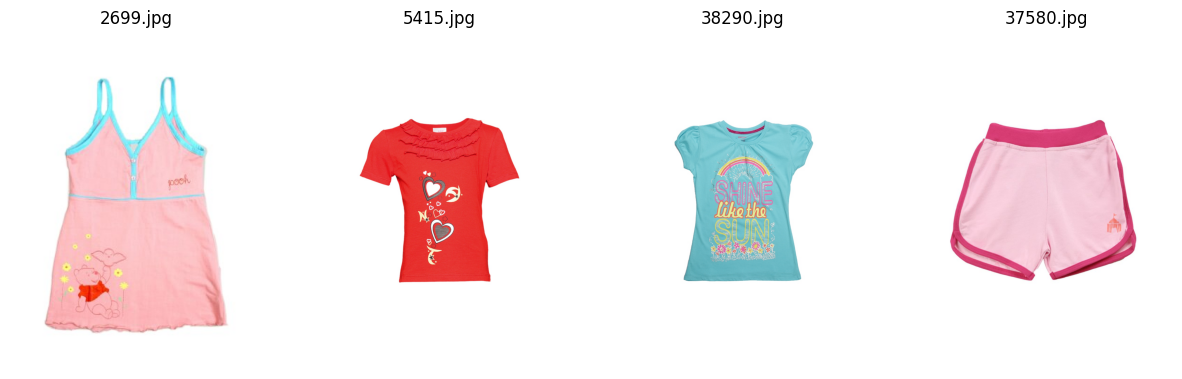

In [ ]:
import matplotlib.pyplot as plt
import os
import random
from PIL import Image

# Function to display random images from a folder
def display_sample_images(folder_path, num_images=4):
    image_files = [f for f in os.listdir(folder_path) if f.endswith(".jpg") or f.endswith(".png")]

    # Ensure we don't request more images than available
    num_images = min(num_images, len(image_files))

    if num_images == 0:
        print(" No images found in the folder:", folder_path)
        return

    sample_files = random.sample(image_files, num_images)

    fig, axes = plt.subplots(1, num_images, figsize=(15, 5))
    for i, file in enumerate(sample_files):
        img_path = os.path.join(folder_path, file)
        img = Image.open(img_path)
        axes[i].imshow(img)
        axes[i].axis("off")
        axes[i].set_title(file)

    plt.show()

# Display random images from Apparel -> Girls
display_sample_images("/content/fashion_dataset/Apparel/Girls/Images/images_with_product_ids")


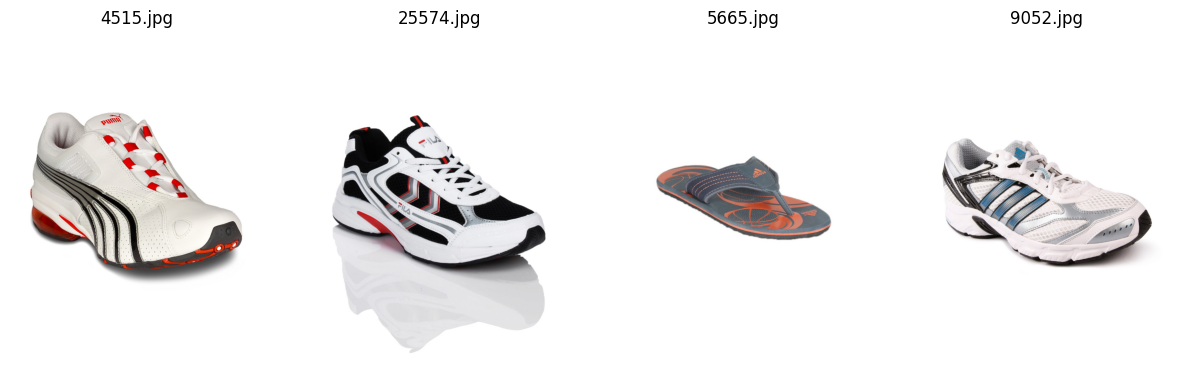

In [ ]:
display_sample_images("/content/fashion_dataset/Footwear/Men/Images/images_with_product_ids")


**Generate Synthetic User Behavioral Data**

In [ ]:
import pandas as pd
import random
import numpy as np

# Load product data
df_products = pd.read_csv("/content/fashion_dataset/fashion.csv")

# Define synthetic user data parameters
num_users = 500  # Number of unique users
num_interactions = 5000  # Total interactions

# Generate user IDs
user_ids = [f"U{i}" for i in range(1, num_users + 1)]

# Define possible interactions
interaction_types = ["viewed", "added_to_cart", "purchased"]

# Generate synthetic user interactions
user_data = []
for _ in range(num_interactions):
    user_id = random.choice(user_ids)
    product_id = random.choice(df_products["ProductId"].tolist())
    interaction = random.choice(interaction_types)
    timestamp = np.random.randint(1622505600, 1672444800)  # Random timestamp (June 2021 - Jan 2023)

    user_data.append([user_id, product_id, interaction, timestamp])

# Create DataFrame
df_users = pd.DataFrame(user_data, columns=["UserID", "ProductID", "Interaction", "Timestamp"])

# Convert Timestamp to readable format
df_users["Timestamp"] = pd.to_datetime(df_users["Timestamp"], unit="s")

# Save user behavior data
df_users.to_csv("/content/user_behavior.csv", index=False)


# Display users data
df_users




,UserID,ProductID,Interaction,Timestamp
0,U484,33267,viewed,2022-02-09 11:47:57
1,U39,41006,viewed,2022-08-11 11:26:37
2,U35,24942,viewed,2022-03-05 00:51:04
3,U16,45340,viewed,2022-06-13 00:36:53
4,U35,4464,viewed,2022-05-20 16:49:29
...,...,...,...,...
4995,U449,36217,added_to_cart,2021-06-10 20:14:11
4996,U116,38905,purchased,2021-08-09 18:37:18
4997,U277,35447,added_to_cart,2021-11-19 11:16:10
4998,U170,39321,added_to_cart,2022-02-11 16:38:41


**Let's add two additional columns to improve recommendations:**

Category → Match ProductID with the product category (from fashion.csv).

Interaction Weight → Assign a score based on user interaction type.

In [ ]:
# Merge user interactions with product categories
df_users = df_users.merge(df_products[["ProductId", "Category"]], left_on="ProductID", right_on="ProductId", how="left")

# Assign interaction weights
interaction_weights = {"viewed": 1, "added_to_cart": 3, "purchased": 5}
df_users["InteractionWeight"] = df_users["Interaction"].map(interaction_weights)

# Drop duplicate ProductId column
df_users.drop(columns=["ProductId"], inplace=True)



# Save updated user behavior data
df_users.to_csv("/content/user_behavior_enhanced.csv", index=False)

# Display updated dataset
df_users

,UserID,ProductID,Interaction,Timestamp,Category,InteractionWeight
0,U484,33267,viewed,2022-02-09 11:47:57,Apparel,1
1,U39,41006,viewed,2022-08-11 11:26:37,Apparel,1
2,U35,24942,viewed,2022-03-05 00:51:04,Apparel,1
3,U16,45340,viewed,2022-06-13 00:36:53,Footwear,1
4,U35,4464,viewed,2022-05-20 16:49:29,Apparel,1
...,...,...,...,...,...,...
4995,U449,36217,added_to_cart,2021-06-10 20:14:11,Apparel,3
4996,U116,38905,purchased,2021-08-09 18:37:18,Apparel,5
4997,U277,35447,added_to_cart,2021-11-19 11:16:10,Apparel,3
4998,U170,39321,added_to_cart,2022-02-11 16:38:41,Apparel,3


**Lets Analyze Dataset Statistics**

**Fashion Dataset (fashion.csv):**


Number of unique products

Distribution of product categories

Most common product types

Missing values (if any)

**User Behavior Data (user_behavior_enhanced.csv):**

Number of unique users

Most frequently interacted products

Interaction distribution (viewed, added to cart, purchased



In [ ]:
import pandas as pd

# Load datasets
df_products = pd.read_csv("/content/fashion_dataset/fashion.csv")
df_users = pd.read_csv("/content/user_behavior_enhanced.csv")

### 🔍 1. Fashion Dataset Overview ###
print("\n📌 Fashion Dataset Overview:")
print(df_products.info())  # Column data types & missing values
print("\nUnique Products:", df_products["ProductId"].nunique())

# Count products per category
print("\n🛍️ Product Category Distribution:")
print(df_products["Category"].value_counts())

# Count product types
print("\n👕 Most Common Product Types:")
print(df_products["ProductType"].value_counts())

# Check for missing values
print("\n❌ Missing Values in Fashion Dataset:")
print(df_products.isnull().sum())

### 🔍 2. User Behavior Data Overview ###
print("\n📌 User Behavior Data Overview:")
print(df_users.info())  # Column data types & missing values
print("\nUnique Users:", df_users["UserID"].nunique())

# Most frequently interacted products
print("\n🔥 Most Popular Products (Most Interactions):")
print(df_users["ProductID"].value_counts().head(10))

# Interaction type distribution
print("\n🛒 Interaction Type Distribution:")
print(df_users["Interaction"].value_counts())

# Check for missing values
print("\n❌ Missing Values in User Data:")
print(df_users.isnull().sum())



📌 Fashion Dataset Overview:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2906 entries, 0 to 2905
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   ProductId     2906 non-null   int64 
 1   Gender        2906 non-null   object
 2   Category      2906 non-null   object
 3   SubCategory   2906 non-null   object
 4   ProductType   2906 non-null   object
 5   Colour        2906 non-null   object
 6   Usage         2906 non-null   object
 7   ProductTitle  2906 non-null   object
 8   Image         2906 non-null   object
 9   ImageURL      2906 non-null   object
dtypes: int64(1), object(9)
memory usage: 227.2+ KB
None

Unique Products: 2906

🛍️ Product Category Distribution:
Category
Footwear    1580
Apparel     1326
Name: count, dtype: int64

👕 Most Common Product Types:
ProductType
Tshirts            637
Casual Shoes       403
Heels              348
Sports Shoes       341
Tops               229
Flip Flops         

**Clean & Vectorize Product Titles**

In [ ]:
import pandas as pd
import re
from sklearn.feature_extraction.text import TfidfVectorizer

# Load product dataset
df_products = pd.read_csv("/content/fashion_dataset/fashion.csv")

# Text Cleaning Function
def clean_text(text):
    text = text.lower()  # Convert to lowercase
    text = re.sub(r'[^a-zA-Z0-9 ]', '', text)  # Remove special characters
    return text

# Apply cleaning to Product Titles
df_products["CleanedTitle"] = df_products["ProductTitle"].astype(str).apply(clean_text)

# Convert Cleaned Text into Vectors using TF-IDF
vectorizer = TfidfVectorizer(stop_words="english")
tfidf_matrix = vectorizer.fit_transform(df_products["CleanedTitle"])

# Display cleaned text and TF-IDF shape
print("\n📌 Sample Cleaned Product Titles:")
print(df_products[["ProductTitle", "CleanedTitle"]].head())

print("\n🔢 TF-IDF Matrix Shape:", tfidf_matrix.shape)  # Expected shape: (2906, Feature_Count)

# Save processed data
df_products.to_csv("/content/fashion_cleaned.csv", index=False)



📌 Sample Cleaned Product Titles:
                                  ProductTitle  \
0           Gini and Jony Girls Knit White Top   
1                Gini and Jony Girls Black Top   
2  Gini and Jony Girls Pretty Blossom Blue Top   
3   Doodle Kids Girls Pink I love Shopping Top   
4             Gini and Jony Girls Black Capris   

                                  CleanedTitle  
0           gini and jony girls knit white top  
1                gini and jony girls black top  
2  gini and jony girls pretty blossom blue top  
3   doodle kids girls pink i love shopping top  
4             gini and jony girls black capris  

🔢 TF-IDF Matrix Shape: (2906, 1189)


**Extract Image Features Using CNN (MobileNetV2)**

In [ ]:
import tensorflow as tf
from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras.applications.mobilenet_v2 import preprocess_input
from tensorflow.keras.preprocessing import image
import numpy as np
import os
import pickle

# Load MobileNetV2 Model (Pretrained on ImageNet)
model = MobileNetV2(weights='imagenet', include_top=False, pooling='avg')

# Function to extract image features
def extract_features(img_path):
    img = image.load_img(img_path, target_size=(224, 224))  # Resize image
    img_array = image.img_to_array(img)  # Convert to numpy array
    img_array = np.expand_dims(img_array, axis=0)  # Add batch dimension
    img_array = preprocess_input(img_array)  # Normalize for MobileNetV2

    features = model.predict(img_array)  # Extract features
    return features.flatten()  # Convert to 1D vector

# Base folder containing all product images
base_dir = "/content/fashion_dataset"

# Path to save extracted features
feature_save_path = "/content/image_features.pkl"

# Check if features are already saved
if os.path.exists(feature_save_path):
    with open(feature_save_path, "rb") as f:
        image_features = pickle.load(f)
    print("✅ Image features loaded from saved file. No need to re-extract!")

else:
    print("🔄 No saved features found. Running feature extraction...")

    # Initialize dictionary only if features don't exist
    image_features = {}

    # Loop through all categories & subcategories
    for category in ["Apparel", "Footwear"]:
        category_path = os.path.join(base_dir, category)
        for subcategory in os.listdir(category_path):  # Boys, Girls, Men, Women
            subcategory_path = os.path.join(category_path, subcategory, "Images", "images_with_product_ids")

            # Check if folder exists (avoid errors)
            if os.path.exists(subcategory_path):
                for img_file in os.listdir(subcategory_path):
                    img_path = os.path.join(subcategory_path, img_file)

                    # Process only image files (jpg, png, etc.)
                    if img_file.lower().endswith((".jpg", ".png", ".jpeg")):
                        image_features[img_file] = extract_features(img_path)

    # Save extracted image features
    with open(feature_save_path, "wb") as f:
        pickle.dump(image_features, f)

    print(f"✅ Image features saved successfully at: {feature_save_path}")


<ipython-input-22-2247d4dbd75c>:10: UserWarning: `input_shape` is undefined or non-square, or `rows` is not in [96, 128, 160, 192, 224]. Weights for input shape (224, 224) will be loaded as the default.
  model = MobileNetV2(weights='imagenet', include_top=False, pooling='avg')


9406464/9406464 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
🔄 No saved features found. Running feature extraction...
1/1 ━━━━━━━━━━━━━━━━━━━━ 5s 5s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
1/1 ━━━━━━━━━━━━━━━━━━

**Build the Recommendation Model**

We will now combine the text features (TF-IDF) and image features (MobileNetV2 embeddings) to compute similarity for content-based recommendations.

In [ ]:
import pandas as pd
import pickle

# Load cleaned product data
df_products = pd.read_csv("/content/fashion_cleaned.csv")

# Load user behavior data
df_users = pd.read_csv("/content/user_behavior_enhanced.csv")

# Load extracted image features
with open("/content/image_features.pkl", "rb") as f:
    image_features = pickle.load(f)

print("✅ All required data successfully loaded!")
print(f"📌 Total Products: {df_products.shape[0]}, Total Users: {df_users['UserID'].nunique()}")


✅ All required data successfully loaded!
📌 Total Products: 2906, Total Users: 500


In [ ]:
import pickle

# Save the TF-IDF matrix for future use
with open("/content/tfidf_matrix.pkl", "wb") as f:
    pickle.dump(tfidf_matrix, f)

print("✅ TF-IDF matrix saved successfully at /content/tfidf_matrix.pkl")


✅ TF-IDF matrix saved successfully at /content/tfidf_matrix.pkl


In [ ]:
import pickle

# Load the saved TF-IDF matrix
with open("/content/tfidf_matrix.pkl", "rb") as f:
    tfidf_matrix = pickle.load(f)

print("✅ TF-IDF matrix loaded successfully!")


✅ TF-IDF matrix loaded successfully!


**Compute Similarity Between Products**

We need to compute similarity based on:

Text Features (TF-IDF)

Image Features (MobileNetV2)

Combine Both Scores for Hybrid Recommendations

**Compute Text-Based Similarity**

In [ ]:
from sklearn.metrics.pairwise import cosine_similarity
import numpy as np

# Compute cosine similarity between products based on TF-IDF vectors
text_similarity = cosine_similarity(tfidf_matrix)

# Save the similarity matrix
np.save("/content/text_similarity.npy", text_similarity)

print("✅ Text-based similarity matrix computed and saved!")


✅ Text-based similarity matrix computed and saved!


**Compute Image-Based Similarity**

In [ ]:
import pickle
from sklearn.metrics.pairwise import cosine_similarity
import numpy as np

# Load extracted image features
with open("/content/image_features.pkl", "rb") as f:
    image_features = pickle.load(f)

# Convert dictionary to array for similarity computation
image_feature_vectors = np.array(list(image_features.values()))

# Compute cosine similarity between image feature vectors
image_similarity = cosine_similarity(image_feature_vectors)

# Save the similarity matrix
np.save("/content/image_similarity.npy", image_similarity)

print("✅ Image-based similarity matrix computed and saved!")


✅ Image-based similarity matrix computed and saved!


**compute & Save TF-IDF Similarity Matrix**

In [ ]:
import pickle
import numpy as np
from sklearn.metrics.pairwise import cosine_similarity

# Load TF-IDF Matrix
with open("/content/tfidf_matrix.pkl", "rb") as f:
    tfidf_matrix = pickle.load(f)

# Compute Cosine Similarity between Products based on Text Features
text_similarity = cosine_similarity(tfidf_matrix)

# Save the similarity matrix
with open("/content/tfidf_similarity.pkl", "wb") as f:
    pickle.dump(text_similarity, f)

print("✅ TF-IDF Similarity Matrix computed and saved as tfidf_similarity.pkl")


✅ TF-IDF Similarity Matrix computed and saved as tfidf_similarity.pkl


**Combine Text & Image Similarity**

In [ ]:
import pickle
import numpy as np
from sklearn.preprocessing import MinMaxScaler

# Load Text Similarity (TF-IDF Cosine Similarity)
with open("/content/tfidf_similarity.pkl", "rb") as f:
    text_similarity = pickle.load(f)

# Load Image Similarity
image_similarity = np.load("/content/image_similarity.npy")

# Normalize both similarity matrices
scaler = MinMaxScaler()
text_similarity_scaled = scaler.fit_transform(text_similarity)
image_similarity_scaled = scaler.fit_transform(image_similarity)

# Define Weights (Adjustable)
TEXT_WEIGHT = 0.6
IMAGE_WEIGHT = 0.4

# Compute Final Similarity
final_similarity = (TEXT_WEIGHT * text_similarity_scaled) + (IMAGE_WEIGHT * image_similarity_scaled)

# Save the final similarity matrix
np.save("/content/final_similarity.npy", final_similarity)

print("✅ Final Combined Similarity Matrix computed and saved!")


✅ Final Combined Similarity Matrix computed and saved!


**Load the similarity matrices**

In [ ]:
import numpy as np
import pickle

# Load Text-Based Similarity (TF-IDF)
with open("/content/tfidf_similarity.pkl", "rb") as f:
    text_similarity = pickle.load(f)

# Load Image-Based Similarity
with open("/content/image_features.pkl", "rb") as f:
    image_features = pickle.load(f)

# Load Final Combined Similarity Matrix (NumPy format)
final_similarity = np.load("/content/final_similarity.npy")

print("✅ All similarity matrices successfully loaded!")


✅ All similarity matrices successfully loaded!


**Define the Recommendation Function**

In [ ]:
import pandas as pd

# Load product data (to map Product IDs)
df_products = pd.read_csv("/content/fashion_cleaned.csv")
product_ids = df_products["ProductId"].values

# Recommendation Function
def recommend_products(product_id, top_n=5):
    if product_id not in product_ids:
        print("❌ Product ID not found!")
        return []

    # Find the index of the given product
    idx = np.where(product_ids == product_id)[0][0]

    # Get similarity scores for the given product
    similarity_scores = final_similarity[idx]

    # Get the top N similar product indices
    similar_indices = np.argsort(similarity_scores)[::-1][1:top_n+1]

    # Get product details for recommended items
    recommended_products = df_products.iloc[similar_indices][["ProductId", "ProductTitle"]]

    return recommended_products




**Test the Recommendation Function**

In [ ]:

sample_product = product_ids[10]  # Pick a random product ID from the dataset
print(f"🔍 **Recommended products for Product ID {sample_product}:**")
recommendations = recommend_products(sample_product)
print(recommendations)

🔍 **Recommended products for Product ID 47153:**
     ProductId                           ProductTitle
514      46834        Gini and Jony Girls Blue Capris
490      34155           Gini and Jony Girls Pink Top
262      42002  Gini and Jony Girls Kinky Pink Capris
435      13341      Gini and Jony Girls Purple Capris
415      43041           Gini and Jony Girls Pink Top


In [ ]:
from google.colab import files

# List of files to download
files_to_save = [
    "/content/fashion_cleaned.csv",
    "/content/user_behavior_enhanced.csv",
    "/content/tfidf_matrix.pkl",
    "/content/tfidf_similarity.pkl",
    "/content/image_features.pkl",
    "/content/image_similarity.npy",
    "/content/final_similarity.npy",


]

# Download each file
for file in files_to_save:
    try:
        files.download(file)
        print(f"✅ Downloaded: {file}")
    except:
        print(f"❌ File not found: {file}")


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

✅ Downloaded: /content/fashion_cleaned.csv


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

✅ Downloaded: /content/user_behavior_enhanced.csv


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

✅ Downloaded: /content/tfidf_matrix.pkl


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

✅ Downloaded: /content/tfidf_similarity.pkl


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

✅ Downloaded: /content/image_features.pkl


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

✅ Downloaded: /content/image_similarity.npy


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

✅ Downloaded: /content/final_similarity.npy


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

✅ Downloaded: /content/image_features.pkl


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

✅ Downloaded: /content/image_similarity.npy
